## Reading Input

In [1]:
import pandas as pd
from proj_utils.input_interpreter import format_input

In [2]:
customer_df = pd.read_excel('data/2_detail_table_customers.xls')
deposit_df = pd.read_excel('data/4_detail_table_depots.xls')
routes = customer_df['ROUTE_ID'].unique()

In [3]:
from proj_utils.fake_input_generator import generator
from proj_utils.input_interpreter import format_input

import matplotlib.pyplot as plt

from VRP.greedy_solutions import nearest_neighbour_solution
from VRP.modify_solution import combined_rand_modification
from VRP.verify_solution import valid_path, calculate_path_distance

from proj_utils.path import print_path

from solver_step import SolverStep
%matplotlib widget

# Simulated Annealing Solution

In [4]:
import simulated_annealing.solver as SA # Simulated anealing solver

In [6]:
dists, demand, points = format_input(routes[2],customer_df,deposit_df)
# dists, demand, points = generator(20)

In [7]:
eval_function = lambda x: calculate_path_distance(x, dists) if(valid_path(x,(30,20),demand)) else float('inf')
solver_step = SA.generic_solver_factory(
    lambda x: combined_rand_modification(x, len(points)),
    eval_function,
    )

In [8]:
init_state = nearest_neighbour_solution(dists, demand, (30,20))
init_step = SolverStep(init_state, eval_function(init_state),100)
step_1 = solver_step(init_step)
print(step_1.get_best_sol())
print(step_1.get_best_sol_value())

[0, 1, 0, 26, 0, 57, 0, 8, 0, 6, 0, 61, 0, 44, 0, 29, 0, 33, 0, 39, 0, 63, 0, 40, 0, 43, 0, 59, 0, 51, 0, 18, 0, 71, 0, 42, 0, 48, 0, 14, 0, 12, 75, 64, 0, 41, 0, 17, 19, 0, 31, 0, 5, 0, 46, 0, 45, 0, 47, 13, 0, 66, 0, 76, 0, 77, 0, 27, 0, 65, 0, 58, 0, 52, 0, 78, 0, 74, 0, 23, 0, 54, 0, 24, 0, 70, 69, 67, 37, 16, 0, 15, 0, 28, 0, 7, 0, 38, 0, 21, 0, 36, 56, 0, 32, 0, 55, 0, 2, 35, 0, 72, 0, 10, 0, 49, 0, 30, 0, 62, 0, 68, 0, 22, 0, 11, 0, 4, 0, 50, 0, 9, 0, 34, 0, 73, 0, 25, 0, 53, 0, 20, 0, 60, 0, 3, 0]
inf


In [9]:
step = step_1

In [10]:
step = solver_step(step)
print(step.get_best_sol())
print(step.get_best_sol_value())

[0, 1, 0, 26, 0, 57, 0, 8, 0, 6, 0, 61, 0, 44, 0, 29, 0, 33, 0, 39, 0, 63, 0, 40, 0, 43, 0, 59, 0, 51, 0, 18, 0, 71, 0, 42, 0, 48, 0, 14, 0, 12, 75, 64, 0, 41, 0, 17, 19, 0, 31, 0, 5, 0, 46, 0, 45, 0, 47, 13, 0, 66, 0, 76, 0, 77, 0, 27, 0, 65, 0, 58, 0, 52, 0, 78, 0, 74, 0, 23, 0, 54, 0, 24, 0, 70, 69, 67, 37, 16, 0, 15, 0, 28, 0, 7, 0, 38, 0, 21, 0, 36, 56, 0, 32, 0, 55, 0, 2, 35, 0, 72, 0, 10, 0, 49, 0, 30, 0, 62, 0, 68, 0, 22, 0, 11, 0, 4, 0, 50, 0, 9, 0, 34, 0, 73, 0, 25, 0, 53, 0, 20, 0, 60, 0, 3, 0]
inf


# Taboo Search

In [11]:
import taboo_search.solver as TS

In [12]:
dists, demand, points = generator(20)

In [13]:
taboo_list_size = 10
solver_step = TS.taboo_search_solver_factory(
    lambda x: combined_rand_modification(x, len(points)),
    lambda x: calculate_path_distance(x, dists) if(valid_path(x,(30,20),demand)) else float('inf'),
    taboo_list_size
    )

In [14]:
init_state = nearest_neighbour_solution(dists, demand, (30,20))
init_step = SolverStep(init_state, eval_function(init_state),2)
step_1 = solver_step(init_step)
print(step_1.get_best_sol())

[0, 1, 12, 19, 9, 2, 10, 4, 11, 14, 5, 7, 13, 18, 16, 6, 17, 15, 8, 3, 0]


In [15]:
step = step_1

In [16]:
step = solver_step(step)
print(step.get_best_sol())
print(step.get_best_sol_value())

[0, 1, 12, 19, 9, 2, 10, 4, 14, 11, 7, 5, 13, 18, 16, 6, 17, 15, 8, 3, 0]
466.8818924249938


# Q-learning

In [17]:
from VRP.greedy_solutions import nearest_neighbour_solution
from VRP.modify_solution_routes import remove_smallest_route
from VRP.modify_solution_routes import remove_random_route
from VRP.modify_solution_routes import split_biggest_route
from VRP.modify_solution_routes import split_random_route
from VRP.modify_solution import rand_opt_n
from VRP.modify_solution import rand_reverse_section
from multi_agent.q_learning import *

from proj_utils.fake_input_generator import generator

capacity = (10,4)

dists, demand, points = generator(20)
path = nearest_neighbour_solution(dists, demand, (30,5))

function_list = [
    lambda x: rand_opt_n(x, len(dists)),
    lambda x: remove_smallest_route(x,len(dists),dists),
    lambda x: remove_random_route(x,len(dists),dists),
    lambda x: split_biggest_route(x, len(dists), dists),
    lambda x: split_random_route(x,len(dists), dists),
    #lambda x: rand_reverse_section(x, len(dists))
]

q = q_learning_obj(0,init_q_learning_table(len(function_list)),len(function_list), 0.9, 0.1)
eval_function = lambda x: calculate_path_distance(x, dists) if(valid_path(x,capacity,demand)) else float('inf')

In [18]:
import taboo_search.solver as TS
taboo_list_size = 10
solver_step = TS.taboo_search_solver_factory(
    lambda x: q_learning_iteration(x,q,function_list,eval_function),
    eval_function,
    taboo_list_size
    )

[0, 1, 5, 18, 7, 0, 9, 11, 2, 19, 0, 4, 14, 10, 15, 0, 8, 16, 12, 6, 0, 3, 13, 17, 0]
[0, 17, 5, 1, 0, 9, 7, 18, 19, 0, 12, 3, 6, 13, 0, 4, 15, 10, 11, 0, 14, 16, 8, 2, 0]


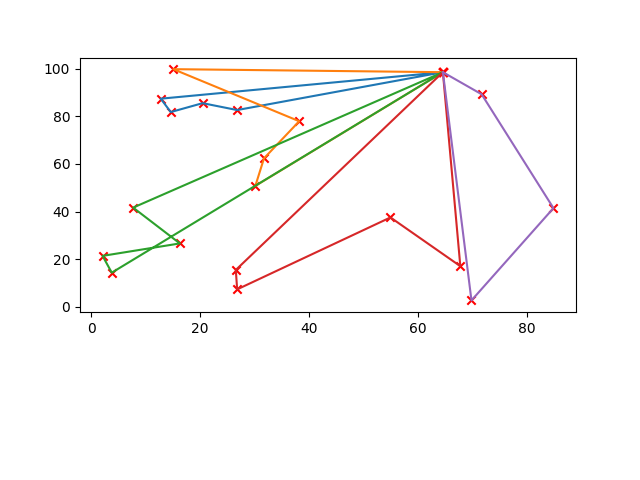

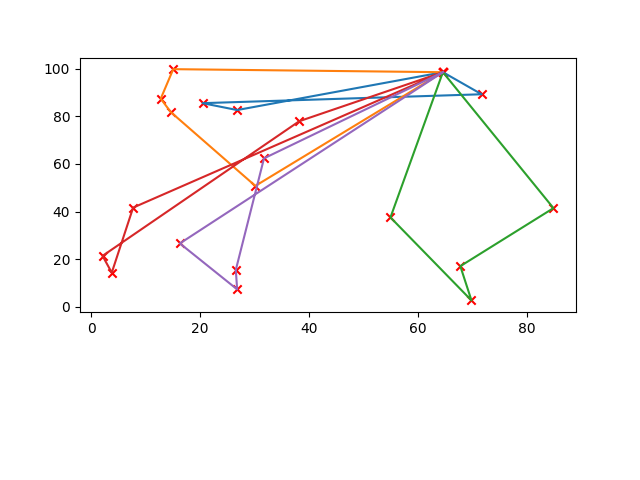

In [19]:
from solver_step import SolverStep
init_state = nearest_neighbour_solution(dists, demand, capacity)
init_step = SolverStep(init_state, eval_function(init_state),200)
print(init_state)
step_1 = solver_step(init_step)

print(step_1.get_best_sol())
print_path(points, init_step.get_best_sol())
print_path(points, step_1.get_best_sol())